# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [176]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged = pd.merge(mouse_metadata,study_results,on="Mouse ID")


# Display the data table for preview
merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [98]:
# Checking the number of mice.
total_mice = merged["Mouse ID"].nunique()
print(total_mice)

249


In [99]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged.groupby("Timepoint")
merged.head()

in_columns = ["Mouse ID","Timepoint"]
dupe_rows = merged[merged.duplicated(subset=in_columns, keep=False)]
dupe_rows.head(20)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [100]:
# Optional: Get all the data for the duplicate mouse ID.
 
duped_mouse = merged[merged.duplicated(subset="Mouse ID", keep=False)]
#Pushing duplicated data into a new DF 'dupe_rows', setting keep= False, so it returns all values
duped_mouse.head(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [206]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped_dupes = merged.drop_duplicates(subset=["Mouse ID","Timepoint"])

dropped_dupes.head(20)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [205]:
# Checking the number of mice in the clean DataFrame.
newtotal_mice = dropped_dupes["Mouse ID"].nunique()
print(newtotal_mice)


249


,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729
...,...,...
1888,Naftisol,63.145652
1889,Naftisol,65.841013
1890,Naftisol,69.176246
1891,Naftisol,70.314904


## Summary Statistics

In [151]:
#summary table

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

import numpy as np
from scipy.stats import sem

#first narrow down to each drug regimen, with all their combined values (mean etc)

druggies = dropped_dupes.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].count()
druggies

druggies_mean = dropped_dupes.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
druggies_mean

druggies_median = dropped_dupes.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
druggies_median

druggies_var = dropped_dupes.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
druggies_var

druggies_std = dropped_dupes.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
druggies_std


druggies_sem = dropped_dupes.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
druggies_sem

newt = pd.DataFrame()
newt['mean'] = druggies_mean
newt["median"]= druggies_median
newt["var"] = druggies_var
newt["std"] = druggies_std
newt["sem"] = druggies_sem
newt


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

##set drug regimen as index.

# Using the aggregation method, produce the same summary statistics in a single line

##N/A since we found solution above already


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

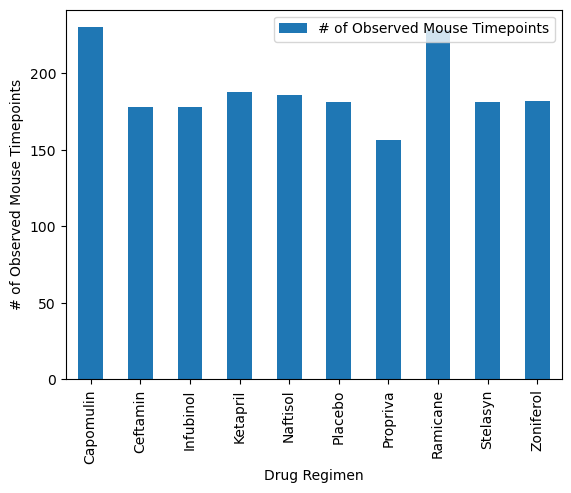

In [201]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

y_values = dropped_dupes.groupby(["Drug Regimen"])["Timepoint"].count()
y_values

drug_names = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
         'Propriva', 'Ramicane','Stelasyn', 'Zoniferol']
x_axis = np.arange(len(y_values))

bar_df = pd.DataFrame({'Drug Regimen': drug_names, '# of Observed Mouse Timepoints': y_values})
bar_df.plot.bar(x='Drug Regimen', y='# of Observed Mouse Timepoints', rot='vertical')


plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()



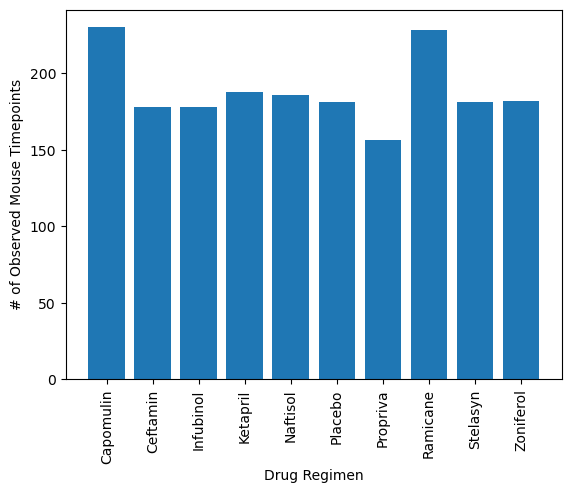

In [202]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
##make a variable first with just mouseid and timepoints to make it easier to plot


#We can reuse the variables created for y_values, drug_names and x_axis above

plt.bar(x_axis,y_values,align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,drug_names,rotation='vertical')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()



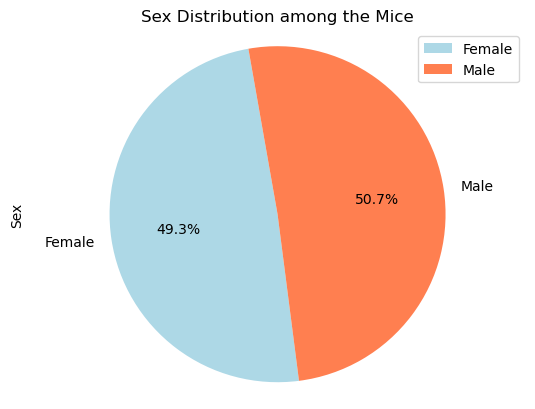

In [196]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


#We create new variables, just to better organize our data for when we plot
#Using 'shape[0]' counts all the rows that meets our conditional row value
sexfem = dropped_dupes[dropped_dupes["Sex"] == "Female"].shape[0]
sexmale = dropped_dupes[dropped_dupes["Sex"] == "Male"].shape[0]
sexes = [sexfem, sexmale]

colors = ["lightblue", "coral"]
labels = ["Female", "Male"]
explode = (0, 0)

df = pd.DataFrame({'Sex': sexes}, index=labels)

df.plot.pie(y='Sex', colors=colors, explode=explode, labels=labels,
            shadow=False, autopct="%1.1f%%", startangle=100)

plt.axis("equal")
plt.title("Sex Distribution among the Mice")
plt.show()


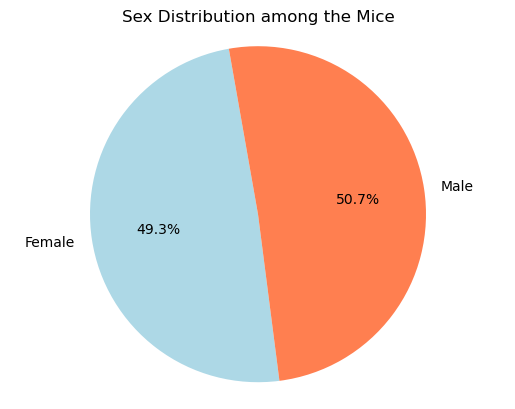

In [199]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["lightblue","coral"]
labels =  ["Female","Male"]
explode = (0,0)

#We can reuse our variables for sexes from the previous pie chart: sexfem, sexmale and sexes

plt.pie(sexes,colors=colors, explode=explode, labels=labels,
        shadow=False,autopct="%1.1f%%", startangle=100)
plt.axis("equal")
plt.title("Sex Distribution among the Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [237]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

##We started by getting the Drug's unique by each mouse, and it's corresponding tumor volume with the timepoint values

drugs_q = dropped_dupes[["Drug Regimen","Tumor Volume (mm3)","Timepoint"]]
drugs_q


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
##We set the condition for the code to store the column info of a mouse, if its timepoint is 45.
greatest_timepoints = drugs_q[drugs_q["Timepoint"]==45]
corresponding_tumor = greatest_timepoints[["Drug Regimen","Tumor Volume (mm3)"]]
corresponding_tumor.head()


##Now we can filter it down to the 4 specific regimens we are interested in.
capomulin = corresponding_tumor["Drug Regimen"]=="Capomulin"
ramicane = corresponding_tumor["Drug Regimen"]=="Ramicane"
infubinol = corresponding_tumor["Drug Regimen"]=="Infubinol"
ceftamin = corresponding_tumor["Drug Regimen"]=="Ceftamin"

##Using the | (or) conditional, so that the script returns the values for when any of the given conditions are met
filtered_drugs = corresponding_tumor[capomulin | ramicane | infubinol | ceftamin]
corresponding_tumor_4 = filtered_drugs[["Drug Regimen","Tumor Volume (mm3)"]]
corresponding_tumor_4


,Drug Regimen,Tumor Volume (mm3)
9,Ramicane,22.050126
19,Capomulin,23.343598
29,Capomulin,28.484033
39,Capomulin,28.430964
49,Ramicane,29.128472
...,...,...
1797,Ceftamin,61.386660
1813,Infubinol,67.685569
1845,Ceftamin,68.594745
1855,Ceftamin,64.729837


In [259]:
# Put treatments into a list for for loop (and later for plot labels)


##Creating a dictionary with key values
tumor_data = {"Capomulin": 0 ,"Ramicane": 0,"Infubinol": 0,"Ceftamin": 0}
keys = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# for value in tumor_data:  # Replace with your list of values
#     for key in keys:
#             value = int(input(keys))
#             tumor_data[key] += value  # Add the value to the existing key

print(tumor_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers.

quartile = corresponding_tumor_4["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])

lowerquart = quartile[0.25]
upperquart = quartile[0.75]
iqr = upperquart - lowerquart
statmedian = quartile[0.5]

print(f'The lower quartile value is : {lowerquart}')
print(f'The upper quartile value is : {upperquart}')
print(f'The IQR value is : {iqr}')
print(f'The median filtered with the specific drug regimes value is : {statmedian}')
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 

##We already have that info inside corresponding_tumor_4
corresponding_tumor_4

    # Determine outliers using upper and lower bounds

upperbound = upperquart + (1.5*iqr)
lowerbound = lowerquart - (1.5*iqr)

outliers = corresponding_tumor_4.loc[(corresponding_tumor_4['Tumor Volume (mm3)'] < lowerbound) | (corresponding_tumor_4['Tumor Volume (mm3)'] > upperbound)]

print(f'any mouse under tumor volumes of: {lowerbound} may be outliers')
print(f'any mouse above tumor volumes of: {upperbound} may be outliers')
print(f'The outlier values are as follows: {outliers}')

{'Capomulin': 0, 'Ramicane': 0, 'Infubinol': 0, 'Ceftamin': 0}
The lower quartile value is : 33.48002734
The upper quartile value is : 62.14221369
The IQR value is : 28.66218635
The median filtered with the specific drug regimes value is : 40.1592203
any mouse under tumor volumes of: -9.513252184999999 may be outliers
any mouse above tumor volumes of: 105.135493215 may be outliers
The outlier values are as follows: Empty DataFrame
Columns: [Drug Regimen, Tumor Volume (mm3)]
Index: []


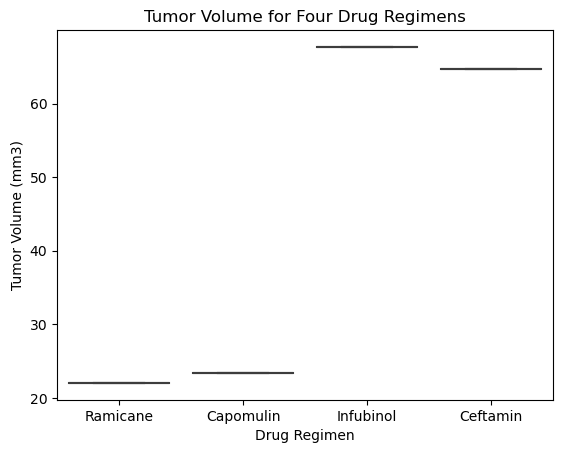

In [264]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a DataFrame from the given data

import seaborn as sns


# Filter the data for a specific drug regimen (e.g., Capomulin)

# Create a DataFrame with the drug regimen and tumor volume data
data4 = {
    'Drug Regimen': ['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin'],
    'Tumor Volume (mm3)': [22.050126, 23.343598, 67.685569, 64.729837]
}

df4 = pd.DataFrame(data4)

# Calculate quartiles and median
quartiles = df4["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
lowerquart = quartiles[0.25]
upperquart = quartiles[0.75]
statmedian = quartiles[0.5]

# Determine upper and lower bounds for outliers
upperbound = df4["Tumor Volume (mm3)"].quantile(0.75) + 1.5 * (df4["Tumor Volume (mm3)"].quantile(0.75) - df4["Tumor Volume (mm3)"].quantile(0.25))
lowerbound = df4["Tumor Volume (mm3)"].quantile(0.25) - 1.5 * (df4["Tumor Volume (mm3)"].quantile(0.75) - df4["Tumor Volume (mm3)"].quantile(0.25))

# Plot the boxplot with quartiles and median
sns.boxplot(x='Drug Regimen', y='Tumor Volume (mm3)', data=df4, whis=[25,75])

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume for Four Drug Regimens')

# Display the boxplot
plt.show()

## Line and Scatter Plots

In [278]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo_rows = dropped_dupes.loc[dropped_dupes['Drug Regimen']=='Capomulin',:]
capo_rows.sort_values["Timepoint"]
cap_row = capo_rows.iloc[0:9]
cap_row
plt.plot(cap_row["Tumor Volume (mm3)"],cap_row["Timepoint"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()




TypeError: 'method' object is not subscriptable

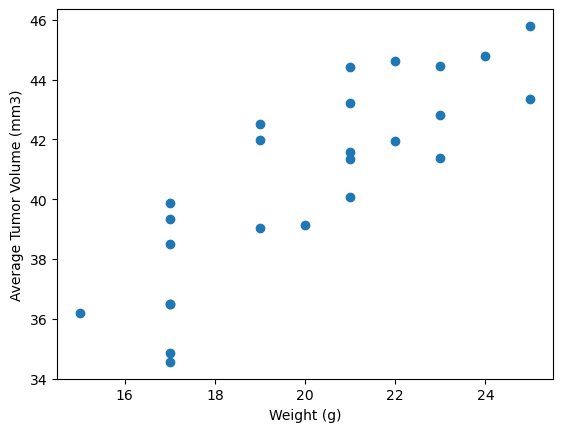

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mousey_rows = dropped_dupes[["Weight (g)","Tumor Volume (mm3)"]]

plt.scatter(mousey_rows)
plt.xlabel("Weight (g)")
plt.ylabel("Average observed tumor (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


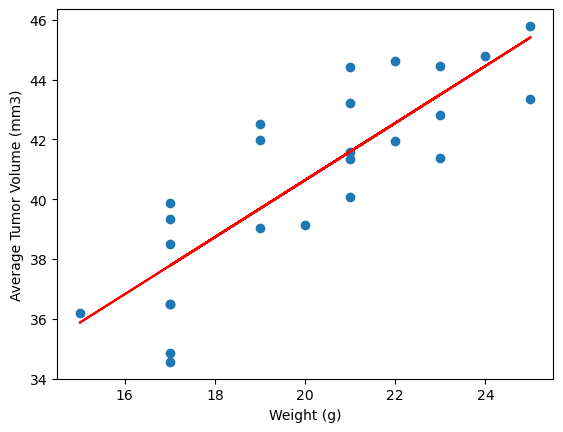

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

x_values = dropped_dupes["Weight (g)"]
y_values= dropped_dupes.loc[dropped_dupes["Tumor Volume (mm3)"]=="Capomulin",:]


(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
line_equ = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, "r-")
plt.annotate(line_equ,(5.8,0.8),fontsize=15,color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Vol (mm3)")

plt.show()


##Finding the correlation coefficient, using pearson r, as it helps us get a better insight into how close the x and y values
##are to the correlation line.
mouse_weight_pear = dropped_dupes.iloc[:,4]
tumor_volume_pear = dropped_dupes.iloc[:,6]
correlation = st.pearsonr(mouse_weight_pear,tumor_volume_pear)
print(f'The correlation between mouse weight and the average tumor volume is{round(correlation[0],2)}')